TASK-3 : IRIS FLOWER CLASSIFICATION

BATCH  : JANUARY BATCH B6

DOMAIN : DATA SCIENCE

NAME   : MONISHA H

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
data = pd.read_csv("/content/iris-flower-dataset/IRIS.csv")
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  150
Number of columns are:  5


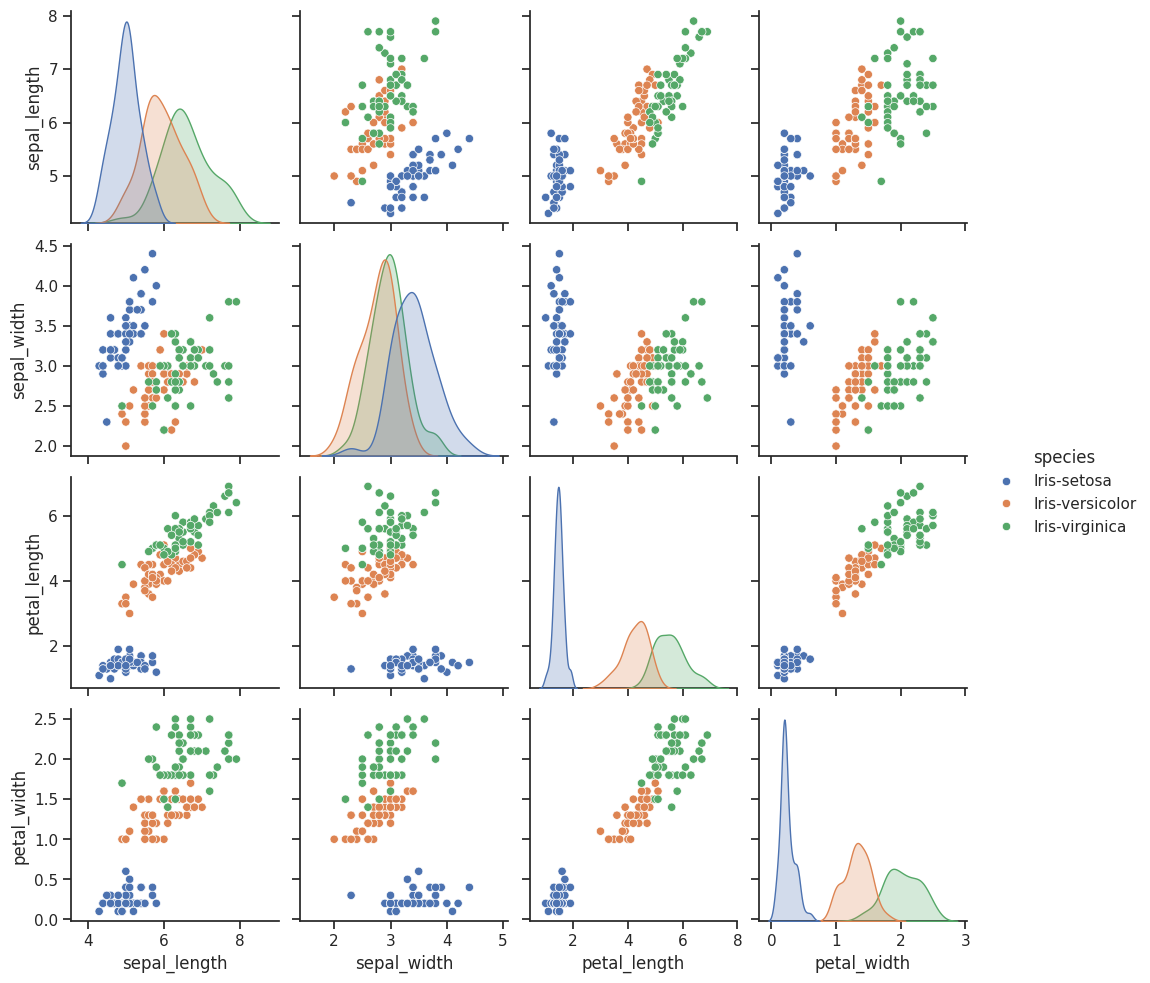

In [ ]:
sns.set(style="ticks",color_codes=True)
g=sns.pairplot(data,hue="species")

In [ ]:
dup = data.duplicated().sum()
print(f'number of duplicated rows are {dup}')


number of duplicated rows are 3


In [ ]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
data.describe(include= 'all').round(2)

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.05,3.76,1.20,NaN
std,0.83,0.43,1.76,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


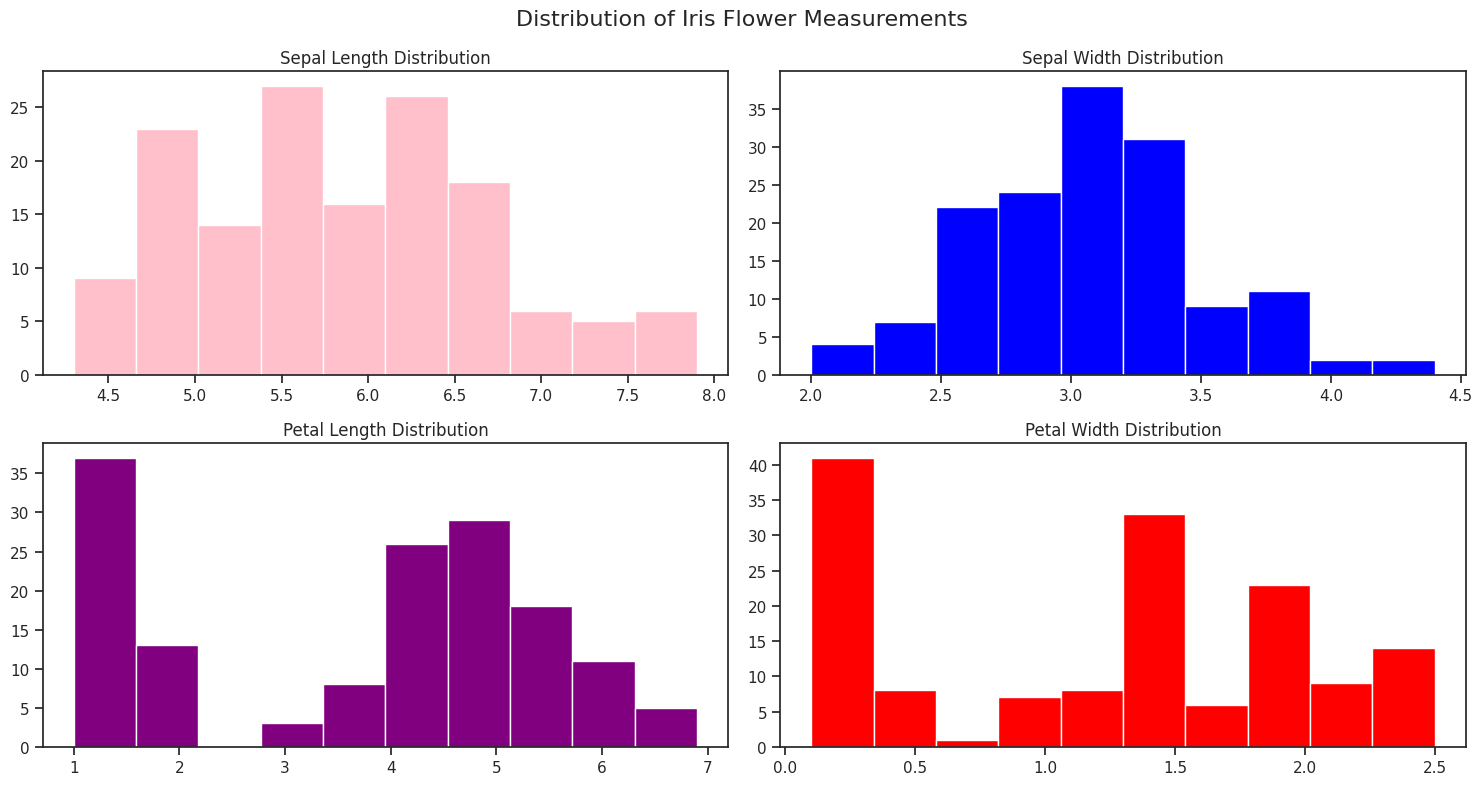

In [ ]:
plt.figure(figsize=(15, 8))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=16)

plt.subplot(2, 2, 1)
plt.hist(data['sepal_length'],color="pink")
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)
plt.hist(data['sepal_width'],color="blue")
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)
plt.hist(data['petal_length'],color="purple")
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)
plt.hist(data['petal_width'],color="red")
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()
plt.show()


In [ ]:
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in sepal_length is 35
No. of unique values in sepal_width is 23
No. of unique values in petal_length is 43
No. of unique values in petal_width is 22
No. of unique values in species is 3


In [ ]:
iris_data=data.iloc[:]
iris_data.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


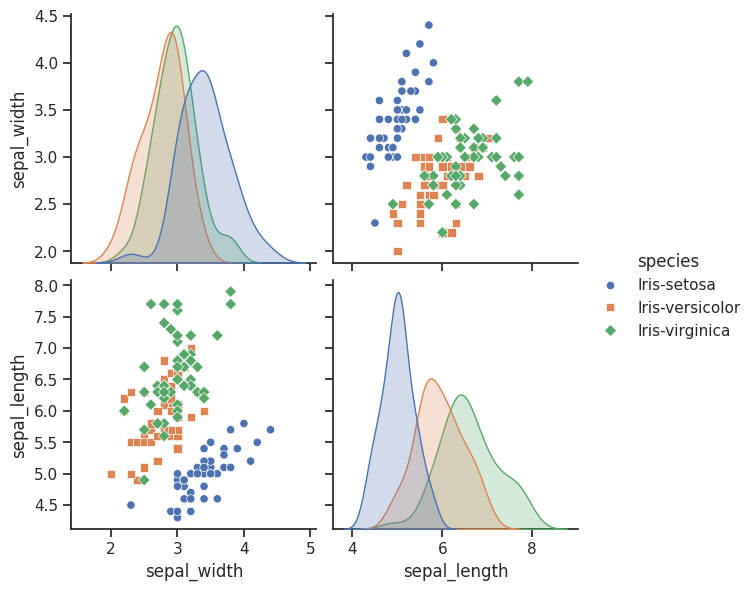

In [ ]:
g=sns.pairplot(data,height=3,vars=["sepal_width","sepal_length"],markers=["o","s","D"],hue="species")

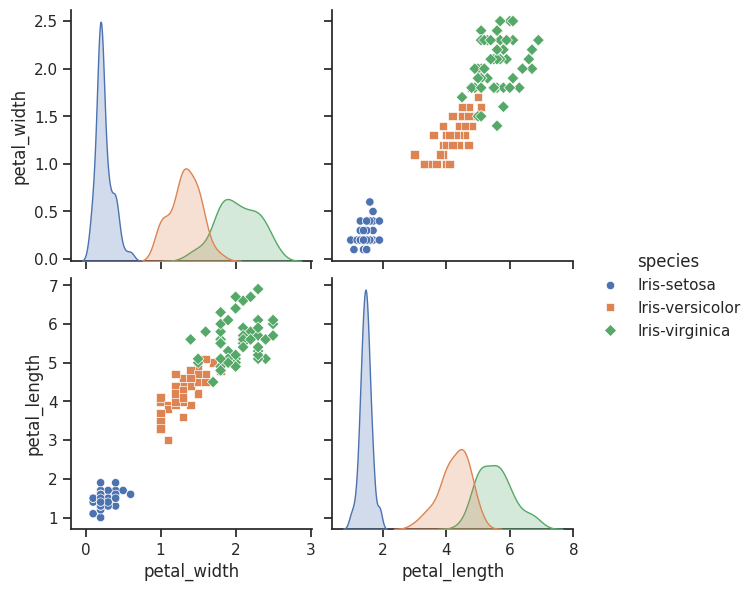

In [ ]:
g=sns.pairplot(data,height=3,vars=["petal_width","petal_length"],markers=["o","s","D"],hue="species")

In [ ]:
iris_data = iris_data.dropna(subset=['sepal_length','sepal_width','petal_length','petal_width'])

iris_data.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [ ]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype

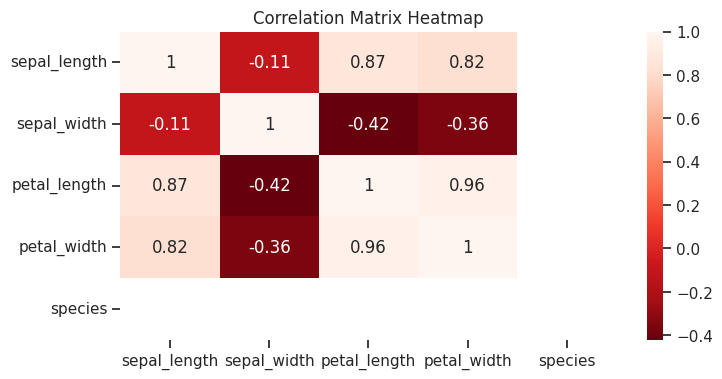

In [ ]:
data_numeric = data.apply(pd.to_numeric, errors='coerce')

corr_matrix = data_numeric.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
le = LabelEncoder()

iris_data['species'] = le.fit_transform(data['species'])
unique_species = data['species'].unique()

print("Encoded Species Values:")
print(unique_species)


Encoded Species Values:
[0 1 2]


In [ ]:
x=iris_data.drop(columns=['species'], axis=1)
y=data['species']


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)
y_train.value_counts()

,count
species,
0,38
2,34
1,33


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
Model_classify= LogisticRegression()
Model_classify.fit(X_train,y_train)

LogisticRegression()

In [ ]:
print("Score for Train data",Model_classify.score(X_train, y_train))
print("Score for Test data",Model_classify.score(X_test, y_test))

Score for Train data 0.9714285714285714
Score for Test data 0.9555555555555556


In [ ]:
Model_classify1= RandomForestClassifier(n_estimators = 300 , random_state=100)
Model_classify1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=100)

In [ ]:
print("Score for Train data",Model_classify1.score(X_train, y_train))
print("Score for Test data",Model_classify1.score(X_test, y_test))

Score for Train data 1.0
Score for Test data 0.9111111111111111


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Model_classify3 = KNeighborsClassifier()
Model_classify3.fit(X_train,y_train)


KNeighborsClassifier()

In [ ]:
print("Score for Train data",Model_classify3.score(X_train, y_train))
print("Score for Test data",Model_classify3.score(X_test, y_test))

Score for Train data 0.9809523809523809
Score for Test data 1.0


In [ ]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
data1 = {'sepal_length': [5.2], 'sepal_width': [3.6], 'petal_length': [1.4], 'petal_width': [0.2]}
trail = pd.DataFrame(data1)

In [ ]:
result = Model_classify.predict(trail)
print("Result Species:", result[0])

Result Species: 0
